# Lab 4: Logistic Regression (continuation) 

This lab is divided into two parts. The first one demonstrates the efficiency of using multiple and polynomial features in logistic regression. The second part includes data analysis techniques. 

<h2>Preparation</h2>

We'll need the following libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
from matplotlib.patches import Rectangle
from scipy.optimize import fmin_bfgs

### Part 1: Training Multiple features using Microchip dataset

The microchip data set contains 3 columns. The scores result of two test process on a manufactured microchips is presented in the 2 first columns. While the third column indicates if the corresponding microchip were accepted or rejected.

**Question 1: **  
We want to use logistic regression to predict whether a microship is accepted or rejected based on its results on the two tests.
- Load data from "microchip.txt" file and extract the features and the output.  
**Hint:** You can use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.
- Determine the number of the tested microships "m".  

**Note:** The two tests score have the same scale [-1,1]. Thus, we don't need to do feature normalization.

In [3]:
# load data
# Type your code here

microchip_data = np.loadtxt('microchip.txt',delimiter=',')

# Type your code here
# we add np.newaxis in the indexing to obtain an array with shape (m,1) instead of (m,)
x_1 = microchip_data[:,0]# we add np.newaxis in the indexing to obtain an array 
x_1 = x_1[:,np.newaxis] # feature1                              
x_2 = microchip_data[:,1] # feature2
x_2 = x_2[:,np.newaxis]
# The output we want to predict 
Y = microchip_data[:,2]  # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)
Y = Y[:,np.newaxis]
# Type your code here
m =  microchip_data.shape[0]# number of microchips
print(x_1.shape)


(118, 1)


Let's visualize the data

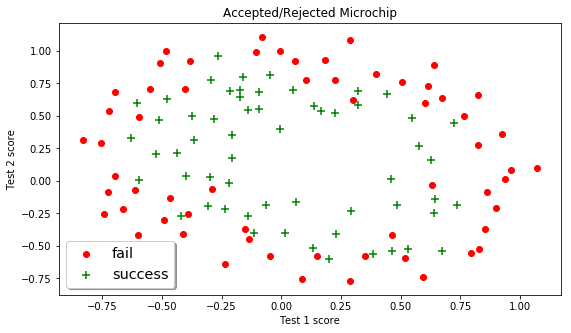

In [4]:
# visualize data
%matplotlib inline
plt.figure("Visualize microchip data",figsize=(9,5))
plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80, label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip')
legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large')

**Question 2: ** 
- Implement the "Poly_Features" function that concatenate to data array the different possible power (below deg) of feature vector f1 and f2 as shown below:$$data=[data,~f_1,~ f_1^2,~ \dots,~ f_1^{deg},~ f_2,~ f_2^2,~ \dots,~ f_2^{deg}]$$
**Hint:** You can use numpy [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function (put two columns or array together) with the parameter **axis=ax**.

In [5]:
def Poly_Features(data,f1,f2,deg,ax):
    # Integrate polynomial terms (x_1^i and x_2^i where i<=degree)
    # Type your code here
#     for i in range(1,deg+1):
#         f1d = f1**i
#         data = np.concatenate((data,f1d),axis = 1)
#     for i in range(1,deg+1):
#         f2d = f2**i
#         data = np.concatenate((data,f2d),axis = 1)
    for i in range(1,deg+1): 
        for j in range(i+1):
            terms= (f1**(i-j) * f2**j)
            data = np.append(data,terms,axis = ax)        
    return data

**Question 3: ** 
- Use the implemented function "Poly_Features" to generate the array of features X.
- Determine the number of features n.

In [6]:
degree=4    # degree of polynomial features
#X=np.ones((m,1))   # initialize X array
X = np.ones(microchip_data.shape[0])[:,np.newaxis]
print(X.shape)
# add polynomial features to the array data X
# Type your code here
X = Poly_Features(X,x_1, x_2,degree,1)
print(X.shape)
n = 2

(118, 1)
(118, 15)


**Question 4: **  
- Create a sigmoid function that returns $sigmoid(z)=\frac{1}{1+e^{-z}}$  
**Hint:** For a vectorized implementation:
- Use [<code>numpy.ones</code>](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html) to have a numerator with the same shape of z
- Use [<code>numpy.exp</code>](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [7]:
def sigmoid(z):
    # Type your code here
    a1 = np.ones(z.shape)
    sigmoid=a1/(a1+np.exp(-z))
    return sigmoid

**Question 5: **
- Create your logistic regression predict function
$$yhat=sigmoid(\theta^\top x)=\frac{1}{1+e^{-\theta^\top x}}$$
**Hint:** Use the sigmoid function  
This new hypothesis formulas will ensure: $0\leq yhat_i\leq 1$  

In [8]:
# Create predict function
def predict(x,theta):
    # Type your code here
    yhat=0
    yhat = sigmoid(np.dot(X,theta))
    return yhat

**Question 6:** 
- Store in the variable m the number of samples.
- Define the criterion or cost function that returns the NLL (Negative Log Likelihood Error):  
**Negative Log Likelihood Error (NLL)**: $$cost=J(\theta)=\frac{-1}{m}\sum_{i=1}^{m}\left [y\times log(yhat+(1-y)\times log(1-yhat)\right ]$$
**Hint:** For a vectorized implementation:
- Use [<code>numpy.sum</code>](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.sum.html) and [<code>numpy.log</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html)

In [9]:
def NLL_cost(yhat, y):
    # Type your code here
     # Type your code here
    m=y.shape[0]
    a1 = np.ones((y.shape[0],1))   
    J =(-np.sum((np.log(yhat)*y)+(np.log(a1-yhat)*(a1-y))))/m
    return J 

**Question 7:** 
The gradient vector of the logistic cost function is calculated as following: $$\nabla J(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}
\\ \frac{\partial J(\theta)}{\partial \theta_1}
\\ \vdots
\\ \frac{\partial J(\theta)}{\partial \theta_{n-1}}
\end{bmatrix}$$ 
where: $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(yhat_i - y_i)~x_{ij}} ~~for~ j=0\dots n-1$
- Implement the "grad_cost_func" function that evaluates the gradient of logistic cost function.  
**Hint:** You can use the vectorized form: $\nabla J(\theta) =\frac{1}{m} x^T(yhat-y)$

In [10]:
def grad_cost_func(theta, X, Y):
    # Type your code here
    m = Y.shape[0]
    yhat=0
    yhat=predict(X,theta)
    g= np.dot(X.transpose(),(yhat-Y))/m
    return g

**Question 8: **
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("NLL_cost_fn"), the name of gradient cost function ("grad_cost_fn") and the initial theta ("theta0").
- Print the optimal theta and the final error.

In [11]:
def NLL_cost_fn(theta):
    J=NLL_cost(predict(X,theta[:,np.newaxis]), Y)
    return J

In [41]:
def grad_cost_fn(theta):
    g=grad_cost_func(theta[:,np.newaxis], X, Y)
    g.shape=(g.shape[0],)
    return g  

In [42]:
# calculate optimal theta
#theta0=np.zeros(shape=(m,m))
theta0 = np.zeros(shape=(X.shape[1], 1))
print(theta0.shape)
# Type your code here
#Thopt,_,_,_,_,_,_, =  fmin_bfgs(NLL_cost_fn, theta0, grad_cost_fn, full_output=True).
Thopt,_,_,_,_,_,_, =  fmin_bfgs(NLL_cost_fn, theta0, grad_cost_fn, full_output=True)
print("The optimal value of theta that minimize cost function is: ",Thopt)
print("Final error = ",NLL_cost(predict(X,Thopt[:,np.newaxis]),Y))

(15, 1)
Optimization terminated successfully.
         Current function value: 0.321905
         Iterations: 197
         Function evaluations: 198
         Gradient evaluations: 198
The optimal value of theta that minimize cost function is:  [  2.9830595   -1.0623118    0.99765139   1.11859025  -5.81579828
  -2.64655041   8.50777566  14.00712848  23.09931758  11.29857555
 -17.99868627  -4.58511047 -36.94084641 -28.96180237 -16.61506806]
Final error =  0.3219045315111062


**Question 9: **
- Use the optimal theta calculated to predict a microchip result (accepted or rejected) that has a score of 0.5 in test 1 and a score of -0.5 in test 2 and the acceptance probability.

In [43]:
# predit microchip result
# Type your code here
# Type your code here
theta_opt= Thopt
# predict student result

test1 = 0.5
test2 = -0.5
result = sigmoid(np.dot(X, theta_opt))

# result = sigmoid(np.dot(np.array([1,test1, test2]), theta_opt))

# print("The predicted result of microchip with {0} and {1} scores is: {2}".format(test1,test2,['Rejected Microchip','Accepted'][int(result)]))
print("With an admission probability: ",result)


With an admission probability:  [8.87414430e-01 9.34746604e-01 9.37547802e-01 9.53849365e-01
 8.68869235e-01 8.97219723e-01 9.41298782e-01 8.24625090e-01
 7.44770831e-01 5.98831694e-01 7.37337670e-01 7.52444507e-01
 8.04126792e-01 5.73863432e-01 8.04562562e-01 8.69538195e-01
 9.39359996e-01 7.42674359e-01 9.34881617e-01 8.08399332e-01
 3.47425605e-01 5.75616240e-01 5.09881813e-01 2.21411404e-01
 5.29689861e-01 3.66580729e-01 7.81683681e-01 3.47946243e-01
 9.65170983e-01 8.52614595e-01 2.13300116e-01 8.38248047e-01
 9.51582502e-01 9.68025513e-01 9.66640576e-01 9.58082855e-01
 8.52890276e-01 9.26907034e-01 9.38325483e-01 8.83830591e-01
 9.38923271e-01 9.26162823e-01 8.35762258e-01 9.40664605e-01
 9.03659616e-01 9.21690442e-01 3.99215262e-01 9.34433254e-01
 4.08903353e-01 6.08441671e-01 9.34007174e-01 9.63252845e-01
 9.62685315e-01 9.71423549e-01 9.68936598e-01 9.52245138e-01
 9.56279252e-01 8.40656353e-01 1.41696478e-02 4.16932461e-01
 8.37739534e-01 2.30650881e-02 5.77413198e-03 2.61778

Let's visualize the decision boundaries.

(50,)
(50,)
(50, 50, 1)
(50, 50, 15)
(15,)


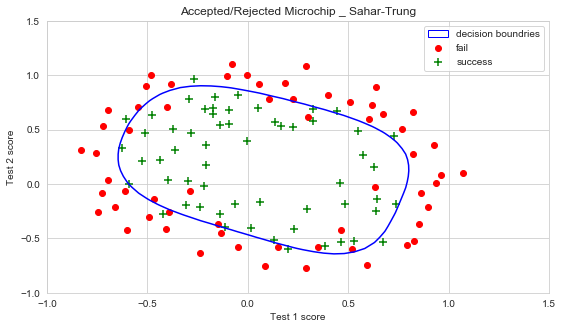

In [44]:
# calculate the mesh grid for contour plot
u1=np.linspace(-1,1.5,50)
u2=np.linspace(-1,1.5,50)
print("u1-->",u1.shape)
print(u2.shape)
u1, u2 = np.meshgrid(u1, u2)

X3=np.ones((*u1.shape,1))
print("X3-->",X3.shape)
X3=Poly_Features(X3,u1[...,np.newaxis],u2[...,np.newaxis],degree,-1)
# X3=Poly_Features(X3,u1,u2,degree,-1)
print("X3-->",X3.shape)
print("Thopt-->",Thopt.shape)
Z=np.dot(X3,Thopt)

# plot descision boundries
plt.figure("Microchip decision boundries",figsize=(9,5))
fail=plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
success=plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80,label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip _ Sahar-Trung')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
extra = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([extra,fail,success], ("decision boundries","fail","success"),loc='best')

 **Question 10: ** 
 - Change the value of the variable "degree" and interpret the modification on the decision boundaries.

**Question 11: ** 
- Implement the "Inter_Features" function that concatenate to data array the different possible power (below deg) of feature vector f1 and f2 as shown below:$$data=[data,~f_1^i~f_2^j ~ where ~ i+j~<=~degree]$$
**Hint:** You can use numpy [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function (put two columns or array together)  with the parameter **axis=ax**..

In [45]:
def Inter_Features(data,f1,f2,deg,ax):
    # Integrate interaction terms (x_1^i*x_2^j where i+j<=degree)
     # Integrate polynomial terms (x_1^i and x_2^i where i<=degree)
#     for i in range(1,deg+1):
#         for j in range(deg-i):
#             terms= (f1**(i) * f2**j)
#            #out= np.hstack((out,terms))
#             data = np.concatenate((data,terms),axis=ax)
            #data = np.append(data,terms,axis = ax) 
#     # Type your code here
    for i in range(1,deg+1):
        for j in range(i+1):
            terms= (f1**(i-j) * f2**j)
            data = np.append(data,terms,axis = ax) 
    return data

**Question 12: ** 
- Use the implemented function "Inter_Features" to generate the array of features X.
- Determine the number of features n.

In [46]:
degree=4 # degree of polynomial feature
#X=np.ones((m,1))   # initialize X array
X = np.ones(microchip_data.shape[0])[:,np.newaxis]



X = Inter_Features(X,x_1, x_2,degree,1)
#X = X1.reshape(X.shape[0]*X.shape[1],1)
print(X.shape)
n = 2

# # add polynomial features to the array data X
# # Type your code here
# X = 
# n = 

(118, 15)


**Question 13: **
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("NLL_cost_fn"), the name of gradient cost function ("grad_cost_fn") and the initial theta ("theta0").
- Print the optimal theta and the final error.

In [47]:
def NLL_cost_fn(theta):
    J=NLL_cost(predict(X,theta[:,np.newaxis]), Y)
    return J

In [48]:
def grad_cost_fn(theta):
    g=grad_cost_func(theta[:,np.newaxis], X, Y)
    g.shape=(g.shape[0],)
    return g  

In [49]:
# calculate optimal theta
#theta0=np.zeros((n,))
theta0 = np.zeros(shape=(X.shape[1], 1))
# Type your code here
Thopt,_,_,_,_,_,_, =  fmin_bfgs(NLL_cost_fn, theta0, grad_cost_fn, full_output=True)
# print("The optimal value of theta that minimize cost function is: ",)
# print("Final error = ",)

Optimization terminated successfully.
         Current function value: 0.321905
         Iterations: 197
         Function evaluations: 198
         Gradient evaluations: 198


Let's visualize the decision boundaries

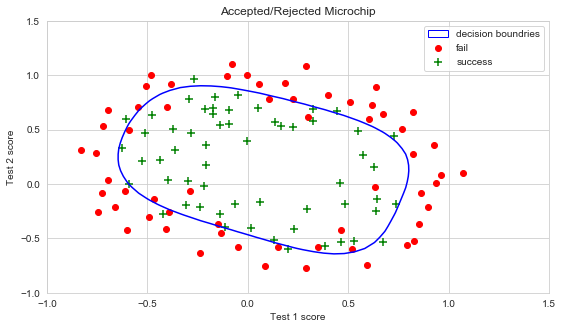

In [50]:
# calculate the mesh grid for contour plot
u1=np.linspace(-1,1.5,50)
u2=np.linspace(-1,1.5,50)
u1, u2 = np.meshgrid(u1, u2)

X3=np.ones((*u1.shape,1))

X3=Inter_Features(X3,u1[...,np.newaxis],u2[...,np.newaxis],degree,-1)

Z=np.dot(X3,Thopt)

# plot descision boundries
plt.figure("Microchip decision boundries",figsize=(9,5))
fail=plt.scatter(x_1[Y==0], x_2[Y==0],  color='red',label='fail')
success=plt.scatter(x_1[Y==1], x_2[Y==1],  color='green',marker='+',s=80,label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
extra = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([extra,fail,success], ("decision boundries","fail","success"),loc='best')

 **Question 14: ** 
 - Change the value of the variable "degree" and interpret the modification on the decision boundaries.

### Part 2: Data analysis using "Titanic" dataset

In this part, you will work on "Titanic" database example (from the website [http://www.data-mania.com/](http://www.data-mania.com/)). This database contains different information about passengers of the sunk "RMS Titanic" ocean liner. The goal is to build classifier that predict if a passenger has survived or not the catastrophe based on the passenger age, sex, ticket fare ...

The "Titanic database lack some information of some passengers. In the other hand, it has some unusable information for survivability prediction like ticket or cabin number. Hence, in the first part you are invited to process the training data by removing unnecessary information and filling the missing data.

In the second part, you should train a logistic classifier using [**sklearn**](http://scikit-learn.org/stable/) library. Then, you can assess its accuracy with some [**metrics**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) of sklearn. 

In [51]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

### Load and process dataset
In this session, we will use new library for data structure and plotting. The [**pandas**](http://pandas.pydata.org/pandas-docs/stable/) library offer the possibility to store data in [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) structure which is similar to classic 2-D array but it has labels for rows and columns and we can use these labels to index a specific component in the dataframe.  
The [**seaborn**](https://seaborn.pydata.org/index.html) library helps us to generate meaningful statistical graphics by extending functionalities in matplotlib library.

**Question 1: **
- Load data from the given "url" in "titanic" variable.   
**Hint:** You can use [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function from pandas library.
- Explore the dataset using [pandas.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [pandas.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html), [pandas.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), [pandas.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).

In [68]:
# load titanic dataset using the url below
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
# Type your code here
#s=requests.get(url).content
titanic = pd.read_csv(url)


# explore data
# Type your code here
print("The size of titanic dataset is: ",titanic.shape)
print("Features name are: ",titanic.columns)

print("\nSome information about the dataset:",titanic.info(verbose=True))
print("\nHow dataset looks like:",titanic.head)

The size of titanic dataset is:  (891, 12)
Features name are:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Some information about the dataset: None

How dataset looks like: <bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1

**Question 2: **
- What is the number of samples (passengers) in each class (y=1:survived, y=0:did not survive).  
**Hint:** You can index dataframe with boolean condition on "Survived" column. You can also use "[where](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)" function from pandas library.

In [69]:
# determine the number of survived/not survived to understand more dataset characteristics 
# Type your code here
# nbr_surviv = titanic[titanic['Survived']==1]
# nbr_died = titanic[titanic['Survived']==0]

nbr_surviv = titanic.where(titanic['Survived']==1)
nbr_died = titanic.where(titanic['Survived']==0)

print("The number of survived passenger in titanic dataset is: ",nbr_surviv)
print("The number of died passenger in titanic dataset is: ",nbr_died)

The number of survived passenger in titanic dataset is:       PassengerId  Survived  Pclass  \
0            NaN       NaN     NaN   
1            2.0       1.0     1.0   
2            3.0       1.0     3.0   
3            4.0       1.0     1.0   
4            NaN       NaN     NaN   
5            NaN       NaN     NaN   
6            NaN       NaN     NaN   
7            NaN       NaN     NaN   
8            9.0       1.0     3.0   
9           10.0       1.0     2.0   
10          11.0       1.0     3.0   
11          12.0       1.0     1.0   
12           NaN       NaN     NaN   
13           NaN       NaN     NaN   
14           NaN       NaN     NaN   
15          16.0       1.0     2.0   
16           NaN       NaN     NaN   
17          18.0       1.0     2.0   
18           NaN       NaN     NaN   
19          20.0       1.0     3.0   
20           NaN       NaN     NaN   
21          22.0       1.0     2.0   
22          23.0       1.0     3.0   
23          24.0       1.0     

#### Remove not significant features
Some features in the "titanic" dataset are meaningless and they doesn't help to predict survivability. Thus, we should remove them.

**Question 3: **
- The "Name" and "cabin" number are two meaningless features and  there are two other features try to guess them. Then, remove all these 4 features from "titanic" dataframe.  
**Hint:** You can use "[drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)" function from pandas library.

In [70]:
# remove non relevant features
# Type your code here
titanic1= titanic.drop(['Name','Ticket','Cabin'], axis=1)
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Deal with missing values
We note from the printed information about our dataset (with the command titanic.info()), that the "Age", "Cabin" and "Embarked" features have some missing values for some passengers. 

First, we will try to estimate missing "Age" from the passenger class "Pclass". If, we calculate the mean age of each class, we note that the 1st class passengers tend to be older than 3rd class manager. Hence, you should fill missing age values with the mean age of the corresponding passenger class.

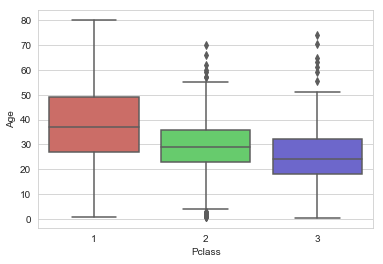

In [85]:
%matplotlib inline

# visualize Age box plot for each passenger class
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')
plt.show()

# calculate mean "Age" per "Pclass"
age = titanic.groupby('Pclass').mean()

As can we see, the age of passengers of class 1 is higher than class 2 , and class 2 is higher than class 3.
It can reflect that rich people are usually elder people, and they prefer the class 1.

**Question 4: **
- Fill the "approx_age" list with the estimated age from the previous means table. Put the estimated age for 1st class in the beginning of the list and for 3rd class at the end. 

In [76]:
# estimate missing Age
# Type your code here
approx_age = age.Age
print(approx_age)

# replace null value by estimated "Age"
# null_age_idx=titanic.isnull(titanic.Age)    # you can also use:  null_age_idx=pd.isnull(titanic['Age'])
null_age_idx=titanic['Age'].isnull()
print(null_age_idx)
# titanic.loc[null_age_idx,'Age']=[approx_age[i-1] for i in titanic.loc[null_age_idx,'Pclass']]
# verify the remaining number of missing value
print("The number of missing value per feature:\n",titanic.isnull().sum())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool
The number of missing value per feature:
 PassengerId      0
Survived         0
Pclass       

- We note that there is two passengers that we don't know their embarking port. We can discard these two samples by dropping them.  
**Hint:** We can use "[dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)" function from pandas library.

In [57]:
titanic=titanic.dropna()
print("The number of missing value per feature:\n",titanic.isnull().sum())

The number of missing value per feature:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### Insert dummies variable
In the "titanic" dataset contains some qualitative features like "Sex" and "Embarked" port. In order to make the  useful in our computational model we should encode them with a numeric way with introducing order between "Embarked" categories for instance.  

In our case, we will use dummies variable method which consist on creating new boolean variable for each categories and encode each categories with "True" on the corresponding dummy variable.

In [58]:
# create "sex" dummy variable
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
print("Remplacement 'Sex' dummy variable:\n",sex.head())

# create "embark_port" dummies variables
embark_port = pd.get_dummies(titanic['Embarked'],drop_first=True)
print("Remplacement 'Embarked' dummies variables:\n",embark_port.head())

# remove qualitative features
titanic.drop(['Sex', 'Embarked'],axis=1,inplace=True)

# insert new dummies variables to replace qualitative features
titanic_dmy = pd.concat([titanic,sex,embark_port],axis=1)
titanic_dmy.head()

Remplacement 'Sex' dummy variable:
    male
0     1
1     0
2     0
3     0
4     1
Remplacement 'Embarked' dummies variables:
    Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Study correlation between feature

Execute the following code block to visualize the  correlation matrix of our processed dataset.

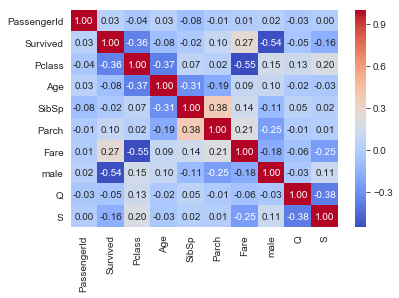

In [59]:
# correlation matrix
sns.heatmap(titanic_dmy.corr(),cmap=cm.coolwarm,annot=True, fmt=".2f")

From the correlation matrix, We note that passenger "Pclass" and ticket "Fare" features are correlated (correlation factor $> 0.5 $). Thus, we can keep only one of them. we will keep "Pclass" and remove "Fare" feature since it is less expressive.

We note also that, "Survived" and "male" features are also correlated. This means that "male" feature can give high intuition about if the passenger had "Survived".

In [60]:
# correlated variable "Fare"
titanic_dmy=titanic_dmy.drop(['Fare'],axis=1)

# Visualize final dataset
print("\nInformation about the final dataset:")
titanic_dmy.info()

titanic_dmy.head()


Information about the final dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
male           712 non-null uint8
Q              712 non-null uint8
S              712 non-null uint8
dtypes: float64(1), int64(5), uint8(3)
memory usage: 41.0 KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.0,1,0,1,0,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1
4,5,0,3,35.0,0,0,1,0,1


### Train logistic classifier and predict
**Question 5: **
- Use "[fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)" function to train the logistic model "Logistic_Regr"
- Use "[predict](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict)" function to predict if passengers (X array) is survived or not.
- calculate the accuracy (number of good prediction/number of all passengers) of the logistic model.

In [83]:
# extract feature and target columns
from sklearn.metrics import accuracy_score
X = titanic_dmy.iloc[:,1:8].values
Y = titanic_dmy.iloc[:,0].values

# train logistic classifier
Logistic_Regr = LogisticRegression()
# Type your code here
fitdata = Logistic_Regr.fit(X, Y)

# predict survavibality
# Type your code here
Yhat = Logistic_Regr.predict(X)

# calculate accuracy
# Type your code here
accuracy = accuracy_score(Yhat, Y)*100
print("The accuracy of our logistic classifier is: ", accuracy)

D:\Study\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Study\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of our logistic classifier is:  7.584269662921349
